In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection, tree, metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge,LassoLars
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, Binarizer, Normalizer
from lightgbm import LGBMClassifier, LGBMRegressor
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv(r"C:\Users\panda4\Documents\Data Science\Online\train_NIR5Yl1.csv")
data

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
5,345568,r,440.0,1.0,23866,5577.0,4.0
6,376865,c,147.0,1.0,10759,17184.0,17.0
7,467378,j,2269.0,2.0,54623,312.0,3.0
8,393640,j,111.0,2.0,172926,53738.0,79.0
9,130054,c,2749.0,1.0,10189,227.0,0.0


In [198]:
gle = LabelEncoder()
Tag_dummies = gle.fit_transform(data['Tag'])
Tag_df = pd.DataFrame(Tag_dummies, columns = ['Tag_numeric'])
Tag_df

,Tag_numeric
0,0
1,0
2,1
3,0
4,1
5,7
6,1
7,4
8,4
9,1


In [199]:
complete_data = pd.concat([data, Tag_df], axis=1)
complete_data

,ID,Tag,Reputation,Answers,Username,Views,Upvotes,Tag_numeric
0,52664,a,3942.0,2.0,155623,7855.0,42.0,0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0,0
2,468453,c,1358.0,4.0,56177,8067.0,60.0,1
3,96996,a,264.0,3.0,168793,27064.0,9.0,0
4,131465,c,4271.0,4.0,112223,13986.0,83.0,1
5,345568,r,440.0,1.0,23866,5577.0,4.0,7
6,376865,c,147.0,1.0,10759,17184.0,17.0,1
7,467378,j,2269.0,2.0,54623,312.0,3.0,4
8,393640,j,111.0,2.0,172926,53738.0,79.0,4
9,130054,c,2749.0,1.0,10189,227.0,0.0,1


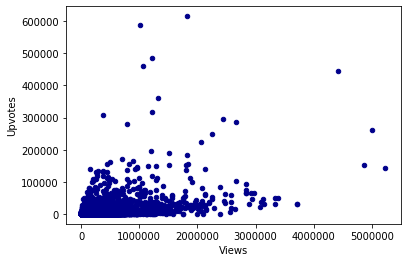

In [200]:
ax1 = complete_data.plot.scatter(x='Views',
                      y='Upvotes',
                      c='DarkBlue')

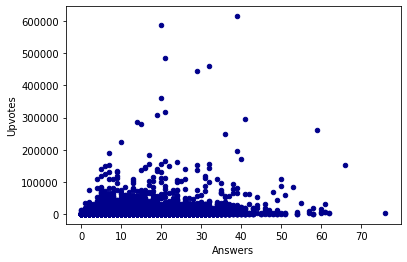

In [201]:
ax1 = complete_data.plot.scatter(x='Answers',
                      y='Upvotes',
                      c='DarkBlue')

In [1]:
X1 = complete_data.drop(['ID','Tag', 'Upvotes', 'Username'], axis=1)
X = X1.astype('int64')
X
bn = Binarizer(threshold=20)
X['Answers'] = bn.transform([X['Answers']])[0]
X

NameError: name 'complete_data' is not defined

In [203]:
scalar=StandardScaler()
X=scalar.fit_transform(X)
poly_reg=PolynomialFeatures(degree=2)
X=poly_reg.fit_transform(X)
X

array([[ 1.        , -0.14157253, -0.08159834, ...,  0.0724462 ,
         0.38238715,  2.01832431],
       [ 1.        ,  0.67523751, -0.08159834, ...,  0.10438513,
        -0.45900222,  2.01832431],
       [ 1.        , -0.23705919, -0.08159834, ...,  0.07104337,
         0.27179089,  1.03979136],
       ...,
       [ 1.        , -0.05894553, -0.08159834, ...,  0.11281917,
         0.34250314,  1.03979136],
       [ 1.        , -0.2839526 , -0.08159834, ...,  0.11570853,
        -0.06232601,  0.0335717 ],
       [ 1.        , -0.21329838, -0.08159834, ...,  0.11198264,
        -0.06131433,  0.0335717 ]])

In [205]:
y1 = pd.DataFrame(complete_data['Upvotes'], columns=['Upvotes'])
y = y1.astype('int64')
y

,Upvotes
0,42
1,1175
2,60
3,9
4,83
5,4
6,17
7,3
8,79
9,0


In [206]:
model = Lasso(alpha=0.021,max_iter=150)
scores = cross_val_score(model, X, y, cv=15, scoring='neg_mean_squared_error')
sqrt(abs(scores.mean()))

1170.7099832706103

In [208]:
test_data = pd.read_csv(r"C:\Users\panda4\Documents\Data Science\Online\test_8i3B3FC.csv")
test_data

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0
5,3514,c,3252.0,1.0,115109,2307.0
6,331420,x,859.0,1.0,88355,6507.0
7,406540,c,770.0,4.0,74489,57775.0
8,227379,s,8727.0,2.0,37904,4459.0
9,331687,p,170.0,4.0,162810,4899.0


In [209]:
gle = LabelEncoder()
Tag_dummies = gle.fit_transform(test_data['Tag'])
Tag_df = pd.DataFrame(Tag_dummies, columns = ['Tag_numeric'])
Tag_df

,Tag_numeric
0,0
1,1
2,3
3,3
4,3
5,1
6,9
7,1
8,8
9,6


In [210]:
complete_data_test = pd.concat([test_data, Tag_df], axis=1)
complete_data_test

,ID,Tag,Reputation,Answers,Username,Views,Tag_numeric
0,366953,a,5645.0,3.0,50652,33200.0,0
1,71864,c,24511.0,6.0,37685,2730.0,1
2,141692,i,927.0,1.0,135293,21167.0,3
3,316833,i,21.0,6.0,166998,18528.0,3
4,440445,i,4475.0,10.0,53504,57240.0,3
5,3514,c,3252.0,1.0,115109,2307.0,1
6,331420,x,859.0,1.0,88355,6507.0,9
7,406540,c,770.0,4.0,74489,57775.0,1
8,227379,s,8727.0,2.0,37904,4459.0,8
9,331687,p,170.0,4.0,162810,4899.0,6


In [211]:
X1 = complete_data_test.drop(['ID','Tag', 'Username'], axis=1)
X_test = X1.astype('int64')
print(X_test.columns)
bn = Binarizer(threshold=20)
X_test['Answers'] = bn.transform([X_test['Answers']])[0]
X_test

Index(['Reputation', 'Answers', 'Views', 'Tag_numeric'], dtype='object')


,Reputation,Answers,Views,Tag_numeric
0,5645,0,33200,0
1,24511,0,2730,1
2,927,0,21167,3
3,21,0,18528,3
4,4475,0,57240,3
5,3252,0,2307,1
6,859,0,6507,9
7,770,0,57775,1
8,8727,0,4459,8
9,170,0,4899,6


In [212]:
scalar=StandardScaler()
X_test=scalar.fit_transform(X_test)
poly_reg=PolynomialFeatures(degree=2)
X_test=poly_reg.fit_transform(X_test)
X_test

array([[ 1.00000000e+00, -8.15433957e-02, -8.24034318e-02, ...,
         1.74236375e-03, -5.94452969e-02,  2.02813180e+00],
       [ 1.00000000e+00,  5.94399878e-01, -8.24034318e-02, ...,
         1.13909751e-01,  3.45352200e-01,  1.04704067e+00],
       [ 1.00000000e+00, -2.50582957e-01, -8.24034318e-02, ...,
         1.16700225e-02,  2.39282089e-02,  4.90623889e-02],
       ...,
       [ 1.00000000e+00, -2.68210652e-01, -8.24034318e-02, ...,
         1.14627815e-01,  3.32176602e-01,  9.62604886e-01],
       [ 1.00000000e+00, -2.77490272e-01, -8.24034318e-02, ...,
         5.98372203e-02, -1.41938570e-01,  3.36689397e-01],
       [ 1.00000000e+00, -2.60579150e-01, -8.24034318e-02, ...,
         4.50946380e-02,  3.02420021e-01,  2.02813180e+00]])

In [213]:
y_test = model.predict(X_test)
y_test = pd.DataFrame(y_test)
y_test.astype('int64').to_csv('submission.csv')

ValueError: shapes (141448,15) and (666,) not aligned: 15 (dim 1) != 666 (dim 0)